In [2]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import sklearn
%matplotlib inline
# 한글출력 : 한글 출력 시 오류 나면 추가
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [ ]:
# 기계학습10 scale-pca

In [8]:
# 데이터 변환
# 교재 참고
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled =scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성 출력
print("변환된 후 크키:",X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n",X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n",X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n",X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n",X_train_scaled.max(axis=0))

(426, 30)
(143, 30)
변환된 후 크키: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [10]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력
print("스케일 조정 후 특성별 최소값:\n",X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n",X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최대값:
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


In [14]:
# 주성분 분석
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler # import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)

# cancer 데이터로 PCA 모델 구축
pca.fit(X_scaled)

# 처음 두 개의 주성문을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:{}".format(str(X_scaled.shape)))
print("축소된 데이터 형태:{}".format(str(X_pca.shape)))

원본 데이터 형태:(569, 30)
축소된 데이터 형태:(569, 2)


In [22]:
# KNN 얼굴인식 사전작업
# 교재 참고
from sklearn.datasets import fetch_lfw_people # import LFW 데이터셋
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) # load LFW

mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0 ~ 255 사이의 흑백 이미지의 픽셀 값을 0 ~ 1 스케일로 조정합니다
# MinMaxScaler를 적용하는 것과 거의 같다
X_people = X_people / 255.

In [26]:
# KNN 얼굴인식(분류)
from sklearn.neighbors import KNeighborsClassifier

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)

# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델 구축
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("1-최근접 이웃의 테스트 세트 점수:{:.2f}".format(knn.score(X_test,y_test)))

# 강의 자료의 출력 결과는 0.28
# 교재의 출력 결과는 0.23

1-최근접 이웃의 테스트 세트 점수:0.23


In [30]:
# PCA(pc = 100)
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shpae:{}".format(X_train_pca.shape))
print("X_test_pca.shape:{}".format(X_test_pca.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("테스트 세트 정확도:{:.2f}".format(knn.score(X_test_pca,y_test)))

# 강의 자료의 출력 결과 : (1182, 100) / (395, 100) / 0.34(whiten 없이 0.28)
# 교재 출력 결과는 아래와 같음

X_train_pca.shpae:(1547, 100)
X_test_pca.shape:(516, 100)
테스트 세트 정확도:0.31


In [35]:
# 기계학습11 slustering

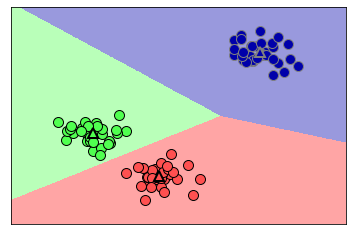

In [38]:
# k-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계
# 교재 참고
mglearn.plots.plot_kmeans_boundaries()

In [47]:
# K-Mean 클러스터 경계
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2차원 데이터 생성
X, y = make_blobs(random_state=1)

# 군집 모델 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)

# 실행할 때마다 출력값 변경

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [65]:
# 벡터 양자화(vector quantization) : 연속적인 값을 그룹화하여 대표값으로 표현
# 강의 자료 + 교재 참고
from sklearn.decomposition import NMF
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=42)
nmf = NMF(n_components=100,random_state=0,max_iter=1000,tol=1e-2)
nmf.fit(X_train)
pca = PCA(n_components=100,random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)

In [68]:
# 교재 참고
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n",clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


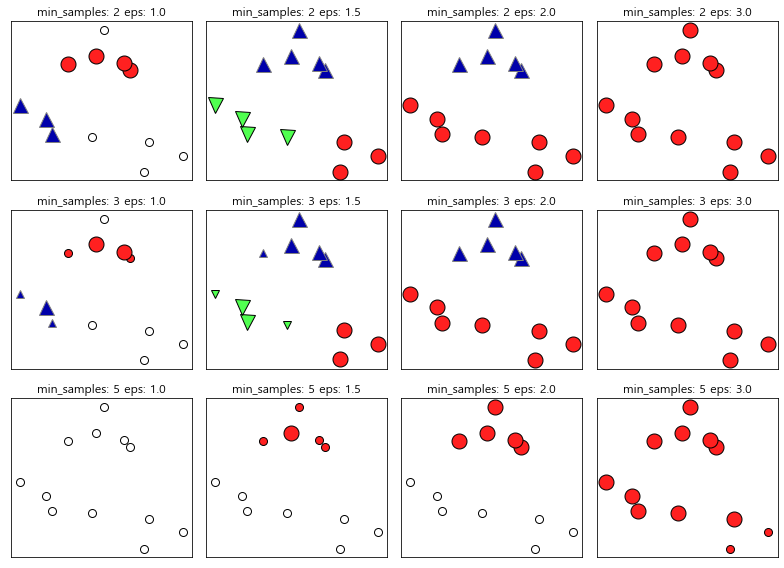

In [69]:
# 교재 참고
mglearn.plots.plot_dbscan()

Text(0, 0.5, '특성 1')

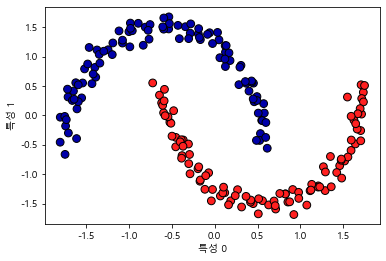

In [74]:
# Moon data + dbscan
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,noise=0.05,random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN() # eps = 0.5, 두 개로 잘 분리
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당 표시
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60,edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

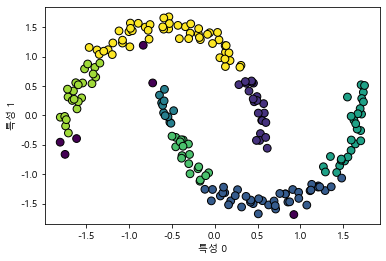

In [84]:
# eps = 0.2, 너무 많은 8개의 클러스터 생성
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당 표시
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap='viridis',s=60,edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

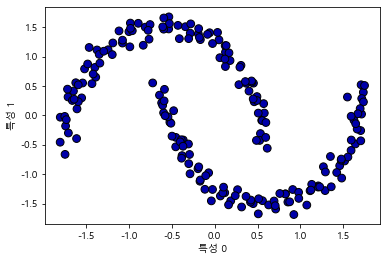

In [76]:
# eps = 0.7, 한 개의 클러스터 생성
dbscan = DBSCAN(eps=0.7)
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당 표시
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60,edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

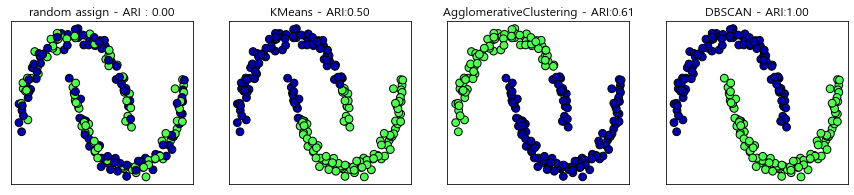

In [93]:
# Moon data로 평가하기
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

# 200개 샘플 생성
X, y = make_moons(n_samples=200,noise=0.05,random_state=0)

# 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

# 모델 리스트 생성
algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]
adjusted_rand_score(y,clusters)

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터 그리기
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assign - ARI : {:.2f}".format(adjusted_rand_score(y, random_cluster)))

for ax,algorithm in zip(axes[1:],algorithms):
    # 클러스터 할당과 클러스터 중심 그리기
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60,edgecolors='black')
    ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))

In [96]:
# ARI 평가
from sklearn.metrics import accuracy_score
# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

# 모든 레이블이 달라졌으므로 정확도는 0
print("정확도:{:.2f}".format(accuracy_score(clusters1,clusters2)))

# 같은 포인트가 클러스터에 모였으므로 ARI는 1
print("ARI:{:.2f}".format(adjusted_rand_score(clusters1,clusters2)))

정확도:0.00
ARI:1.00


In [99]:
# 얼굴 사진으로 군집 수행
# 강의 자료 + 교재 참고
from sklearn.decomposition import PCA

# LFW 데이터에서 고유얼굴을 찾은 다음 데이터 변환
# 주성분으로 의미있는 특징 추출 및 차원 축소로 계산 속도 증가
pca =  PCA(n_components=100,whiten=True,random_state=0)
# Fit the model with X and apply the dimensionality reduction on X
X_pca = pca.fit_transform(X_people)
# 기본 매개변수로 DBSCAN 적용. Default : eps = 0.5, min_samples = 5
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

# eps = 0.3, min_samples = 3
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:",np.unique(labels))

# eps = 15, min_samples = 3
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:",np.unique(labels))

고유한 레이블: [-1]
고유한 레이블: [-1]
고유한 레이블: [-1  0]


In [100]:
# 잡음 포인트와 클러스터에 속한 포인트 수 세기
# bincount는 음수를 받을 수 없어서 labels에 1을 더함
# 반환값의 첫 번째 원소는 잡음 포인트의 수
# eps = 15, min_samples = 3
print("클러스터별 포인트 수:",np.bincount(labels+1))

클러스터별 포인트 수: [  32 2031]


In [103]:
# DBSCAN EPS 조정
# 강의 자료 + 교재 참고
for eps in [1,3,5,7,9,11,13]:
    print("\neps=",eps)
    dbscan = DBSCAN(eps=eps,min_samples=3)
    labels=dbscan.fit_predict(X_pca)
    print("고유한 레이블:",np.unique(labels))
    print("클러스터 수:",len(np.unique(labels)))
    print("클러스터 크기:",np.bincount(labels+1))


eps= 1
고유한 레이블: [-1]
클러스터 수: 1
클러스터 크기: [2063]

eps= 3
고유한 레이블: [-1]
클러스터 수: 1
클러스터 크기: [2063]

eps= 5
고유한 레이블: [-1]
클러스터 수: 1
클러스터 크기: [2063]

eps= 7
고유한 레이블: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
클러스터 수: 14
클러스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
고유한 레이블: [-1  0  1  2]
클러스터 수: 4
클러스터 크기: [1307  750    3    3]

eps= 11
고유한 레이블: [-1  0]
클러스터 수: 2
클러스터 크기: [ 413 1650]

eps= 13
고유한 레이블: [-1  0]
클러스터 수: 2
클러스터 크기: [ 120 1943]


In [113]:
# k-평균으로 클러스터 추출
n_clusters=10
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km=km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:{}".format(np.bincount(labels_km)))

k-평균의 클러스터 크기:[282 226 105 268 151 324 202 208 208  89]


In [117]:
# 병합군집
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg=agglomerative.fit_predict(X_pca)
print("병합 군비의 클러스터 크기:",np.bincount(labels_agg))

# 강의 자료 출력 결과 : [243 623 64 44 158 160 34 37 172 42] 
# 교재 출력 결과는 아래와 같음

병합 군비의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


In [119]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.10
